# Matplotlib: Plotting Subplots in a loop

Two different methods for plotting Matplotlib subplots using a loop.

In this example we will use daily stock data for 5 stocks collected using a finance library called **[ffn](https://pypi.org/project/ffn/)** and then plot the daily time series of each stock on a different subplot

In [1]:
# install requirements if necessary
# ! pip install matplotlib pandas ffn nb_black

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import ffn  # library to get stock data

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

#### Load Example Data

In [4]:
# load daily stock prices for selected stocks from ffn
tickers = ["aapl", "msft", "tsla", "nvda", "intc"]
prices = ffn.get(tickers, start="2017-01-01")

<IPython.core.display.Javascript object>

In [5]:
# convert data into a 'long' table for this plotting exercise
df = prices.melt(ignore_index=False, var_name="ticker", value_name="closing_price")
df.head()

,ticker,closing_price
Date,,
2017-01-03,aapl,27.413372
2017-01-04,aapl,27.382690
2017-01-05,aapl,27.521944
2017-01-06,aapl,27.828764
2017-01-09,aapl,28.083660


<IPython.core.display.Javascript object>

### Method 1: `axs.ravel()`


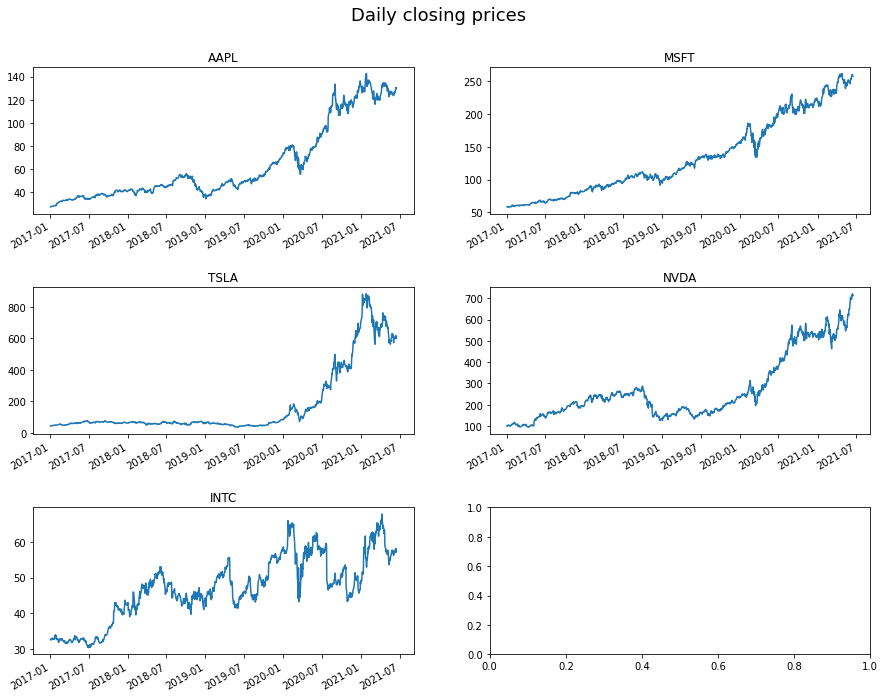

<IPython.core.display.Javascript object>

In [6]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[df["ticker"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

### Method 2: `plt.subplot`

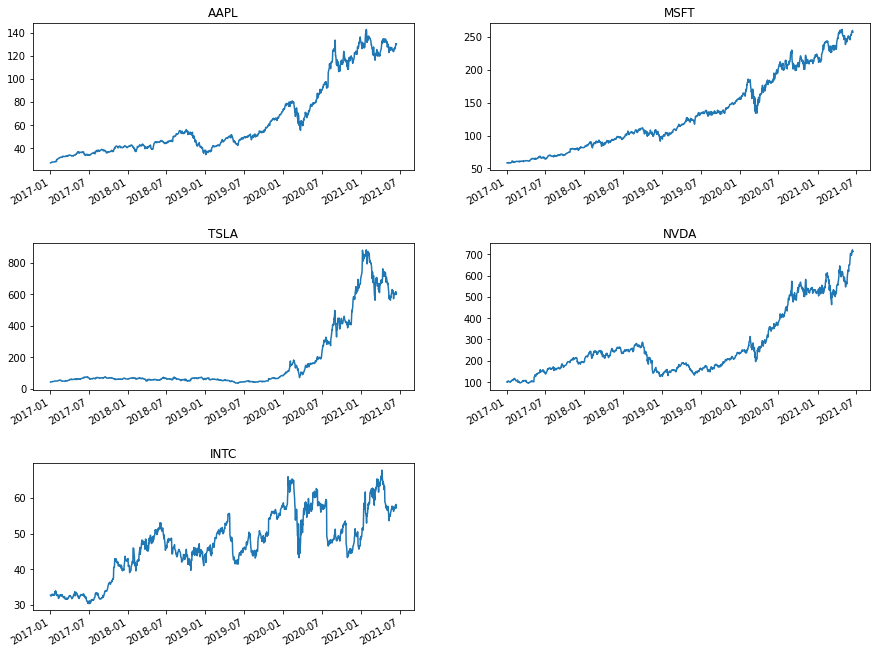

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    df[df["ticker"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

**Pros of Method 2**

- do not get an empty plot at the end if the number of charts is an odd number
- simple syntax

**Cons of Method 2**

- still need to predefine the subplot grid (i.e. number of rows and columns) which means you need to know the length of the tickers in advance
  - this normally should not be a problem as you are unlikely to be plotting a generator instead of a list
  - you could calculate the subplot grid dynamically:
   ```python
    # define number of columns you want
    ncols = 2
    for n, ticker in enumerate(tickers):
        # calc rows and cols dynamically based of number of columns specified
        ax = plt.subplot(len(tickers) // ncols + (len(tickers) % ncols > 0), ncols, n+1)
        df[df["ticker"] == ticker].plot(ax=ax)
    ```